In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3MB 31.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=addfa28f893bfb597aaac59fda54f7b8cde1d6a3c6db9894bf88464e9b0c3e00
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
pip install finta

In [ ]:
pip install Yahoo-ticker-downloader


     |████████████████████████████████| 51kB 6.9MB/s 
  Created wheel for Yahoo-ticker-downloader: filename=Yahoo_ticker_downloader-3.0.1-cp37-none-any.whl size=10184 sha256=45f53199093835924927cd0bc6de01b5f1115c86455fa9ff5ca96777b1e4d460
  Stored in directory: /root/.cache/pip/wheels/8f/8c/49/2f945a8ef86a6301584099c6a92ec9b40498e497517abb01a0
Successfully built Yahoo-ticker-downloader


In [ ]:
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
from finta import TA
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from googlesearch import search

In [ ]:
company_name=input("Enter a company name: ")


Enter a company name: sbi


In [ ]:
searchval = 'yahoo finance '+company_name
link = []
#limits to the first link
for url in search(searchval, tld='es', lang='es', stop=1):
  link.append(url)
  
link = str(link[0])
link=link.split("/")
if link[-1]=='':
  ticker=link[-2]
else:
  x=link[-1].split('=')
  ticker=x[-1]
symbol=ticker
print(symbol)

SBIN.NS


In [ ]:
NUM_DAYS = 10000     # The number of days of historical data to retrieve
INTERVAL = '1d'     # Sample rate of historical data

INDICATORS = ['RSI', 'MACD', 'STOCH','ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'VORTEX']

In [ ]:
start = (datetime.date.today() - datetime.timedelta( NUM_DAYS ) )
end = datetime.datetime.today()

data = yf.download(symbol, start=start, end=end, interval=INTERVAL)
data.rename(columns={"Close": 'close', "High": 'high', "Low": 'low', 'Volume': 'volume', 'Open': 'open'}, inplace=True)

print(data['close'])


[*********************100%***********************]  1 of 1 completed
Date
1996-01-01     18.823240
1996-01-02     18.224106
1996-01-03     17.738192
1996-01-04     17.676863
1996-01-05     17.577793
                 ...    
2021-05-24    412.049988
2021-05-25    412.350006
2021-05-26    413.549988
2021-05-27    425.200012
2021-05-28    422.049988
Name: close, Length: 6387, dtype: float64


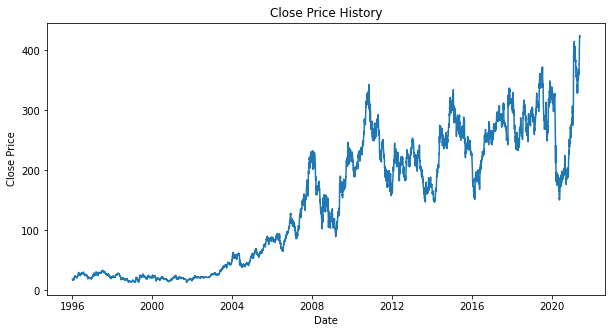

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Close Price History')
plt.plot(data['close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [ ]:
data.to_csv('f1.csv')

In [ ]:
df=pd.read_csv('f1.csv')

In [ ]:
df

,Date,open,high,low,close,Adj Close,volume
0,1996-01-01,18.691147,18.978922,18.540184,18.823240,12.967147,43733533
1,1996-01-02,18.894005,18.964767,17.738192,18.224106,12.554412,56167280
2,1996-01-03,18.327892,18.568489,17.643839,17.738192,12.219668,68296318
3,1996-01-04,17.502312,17.832542,17.223972,17.676863,12.177420,86073880
4,1996-01-05,17.738192,17.785366,17.459852,17.577793,12.109170,76613039
...,...,...,...,...,...,...,...
6382,2021-05-24,417.000000,419.200012,405.299988,412.049988,412.049988,142964052
6383,2021-05-25,415.100006,415.500000,408.500000,412.350006,412.350006,56048127
6384,2021-05-26,413.799988,418.750000,410.799988,413.549988,413.549988,52357719
6385,2021-05-27,413.700012,429.100006,412.000000,425.200012,425.200012,73392997


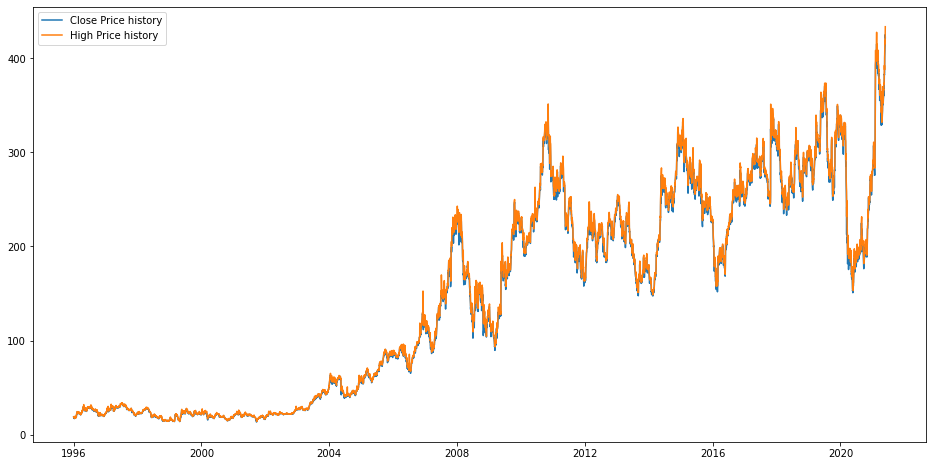

In [ ]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16, 8))
plt.plot(df['close'], label='Close Price history')
plt.plot(df['high'], label='High Price history')
plt.legend()
plt.show()

In [ ]:
#sorting 
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date','close'])

for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['close'][i] = data['close'][i]

In [ ]:
new_data.Date

0       1996-01-01 00:00:00
1       1996-01-02 00:00:00
2       1996-01-03 00:00:00
3       1996-01-04 00:00:00
4       1996-01-05 00:00:00
               ...         
6382    2021-05-24 00:00:00
6383    2021-05-25 00:00:00
6384    2021-05-26 00:00:00
6385    2021-05-27 00:00:00
6386    2021-05-28 00:00:00
Name: Date, Length: 6387, dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)


#creating train and test sets
dataset = new_data.values

train = dataset[0:4000, :]
valid = dataset[4000:, :]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60, len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

#create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=2, batch_size=1, verbose=2)


Epoch 1/2
3940/3940 - 91s - loss: 5.9573e-04
Epoch 2/2
3940/3940 - 75s - loss: 2.0126e-04


In [ ]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
from numpy import newaxis
X_test = X_test[:, :, newaxis]

closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [ ]:
rms = np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms)

11.726671650854847


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


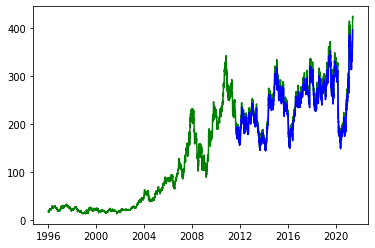

In [ ]:
#for plotting
train = new_data[:4000]
valid = new_data[4000:]
valid['Predictions'] = closing_price
plt.plot(new_data['close'],label='actual',color = 'green')
plt.plot(valid['Predictions'],label='prediction',color = 'blue')
plt.show()